<a id="2"></a>
<div style="display: flex; align-items: center; justify-content: center; text-align:center; border-radius:20px; padding:30px; color:black; margin:0 auto; font-size:500%; font-family:Arial; background-color:Orange; overflow:hidden; width: 700px; height: 340px; 
    box-shadow: 0 0 000px 00px rgba(5.03, 5.00, 5, 5.0);">
    <b>📊 McDonald's Data Dive: EDA & ML Forecasting</b>
</div>


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:Orange; overflow:hidden"><b>  ✨ **About Author** ✨ </b></div>

<div style="background-color: white; border: 9px solid Orange; border-radius: 19px; box-shadow: 0 10px 20px rgba(0, 0, 0, 0.1); max-width: 600px; margin: 20px auto; padding: 20px; text-align: center; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">
    <h2 style="color: black; font-weight: bold; margin-bottom: 10px;">WAQAR ALI</h2>
    <p style="font-size: 16px; line-height: 1.6; color: black; margin-bottom: 20px;">
        I'm a passionate Data Scientist and Analyst, dedicated to transforming raw data into actionable insights through captivating visualizations. Let's dive into the fascinating world of data and uncover the stories hidden within! 📊🔍✨
    </p>
</div>


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Import Libraries ✨</b></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Plotly for interactive plots
import plotly.express as px

# ML Tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Display Settings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Theme setup
sns.set_theme(style="whitegrid", palette="pastel")


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Load Dataset ✨</b></div>

In [2]:
df = pd.read_csv('/kaggle/input/mcdonalds-finanacial-data-2021-2024/Mcdonalds data 2021-24.csv')
df.head()


,table,heading,subheading,2024,2023,2022,2021,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,revenue_breakdown,company_operated,company_operated_us,3197.00,3221.00,"2,836","2,617",NaN,NaN,NaN,NaN,NaN
1,revenue_breakdown,company_operated,company_operated_international_operated_markets,5713.00,5702.00,"5,179","6,456",NaN,NaN,NaN,NaN,NaN
2,revenue_breakdown,company_operated,company_operated_intl_dev_licensed_and_corp,872.00,819.00,733,715,NaN,NaN,NaN,NaN,NaN
3,revenue_breakdown,franchised,franchised_us,7211.00,7163.00,"6,585","6,094",NaN,NaN,NaN,NaN,NaN
4,revenue_breakdown,franchised,franchised_international_operated_markets,6746.00,6549.00,"5,985","5,638",NaN,NaN,NaN,NaN,NaN


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Check Columns ✨</b></div>

In [3]:
df.columns

Index(['table', 'heading', 'subheading', '2024', '2023', '2022', '2021',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Drop Unnecessary Columns ✨</b></div>

In [4]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,table,heading,subheading,2024,2023,2022,2021
0,revenue_breakdown,company_operated,company_operated_us,3197.00,3221.00,"2,836","2,617"
1,revenue_breakdown,company_operated,company_operated_international_operated_markets,5713.00,5702.00,"5,179","6,456"
2,revenue_breakdown,company_operated,company_operated_intl_dev_licensed_and_corp,872.00,819.00,733,715
3,revenue_breakdown,franchised,franchised_us,7211.00,7163.00,"6,585","6,094"
4,revenue_breakdown,franchised,franchised_international_operated_markets,6746.00,6549.00,"5,985","5,638"


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Summary Info ✨</b></div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048504 entries, 0 to 1048503
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   table       85 non-null     object 
 1   heading     85 non-null     object 
 2   subheading  85 non-null     object 
 3   2024        85 non-null     float64
 4   2023        85 non-null     float64
 5   2022        85 non-null     object 
 6   2021        85 non-null     object 
dtypes: float64(2), object(5)
memory usage: 56.0+ MB


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Null Values ✨</b></div>

In [6]:
df.isnull().sum()

table         1048419
heading       1048419
subheading    1048419
2024          1048419
2023          1048419
2022          1048419
2021          1048419
dtype: int64

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Clean Dollar & Comma Strings ✨</b></div>

In [7]:
for year in ['2021', '2022', '2023', '2024']:
    df[year] = (
        df[year].astype(str)
        .str.replace('$', '', regex=False)
        .str.replace(',', '', regex=False)
        .str.strip()
    )

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Convert to Float ✨</b></div>

In [8]:
for year in ['2021', '2022', '2023', '2024']:
    df[year] = pd.to_numeric(df[year], errors='coerce')

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Final Dataset Preview ✨</b></div>

In [9]:
df.head(10)

,table,heading,subheading,2024,2023,2022,2021
0,revenue_breakdown,company_operated,company_operated_us,3197.00,3221.00,2836.00,2617.00
1,revenue_breakdown,company_operated,company_operated_international_operated_markets,5713.00,5702.00,5179.00,6456.00
2,revenue_breakdown,company_operated,company_operated_intl_dev_licensed_and_corp,872.00,819.00,733.00,715.00
3,revenue_breakdown,franchised,franchised_us,7211.00,7163.00,6585.00,6094.00
4,revenue_breakdown,franchised,franchised_international_operated_markets,6746.00,6549.00,5985.00,5638.00
5,revenue_breakdown,franchised,franchised_intl_dev_licensed_and_corp,1758.00,1724.00,1536.00,1353.00
6,revenue_breakdown,other,other_revenues,423.00,316.00,329.00,351.00
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,operating_non_operating_table,operating_costs_company_owned,food_and_paper,2995.00,3039.00,2737.30,3096.80


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Basic Stats ✨</b></div>

In [10]:
df.describe()

,2024,2023,2022,2021
count,85.00,85.00,85.00,85.00
mean,2222.40,2380.91,2037.45,2228.74
std,13363.43,12890.16,12204.90,11872.55
min,-77375.00,-74640.00,-71624.40,-67810.20
25%,3.00,12.00,8.39,10.04
50%,636.00,732.00,733.00,715.00
75%,2536.00,2886.00,2584.00,2404.00
max,66834.00,63480.00,59543.90,57534.70


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Revenue by Year (Bar Plot) ✨</b></div>

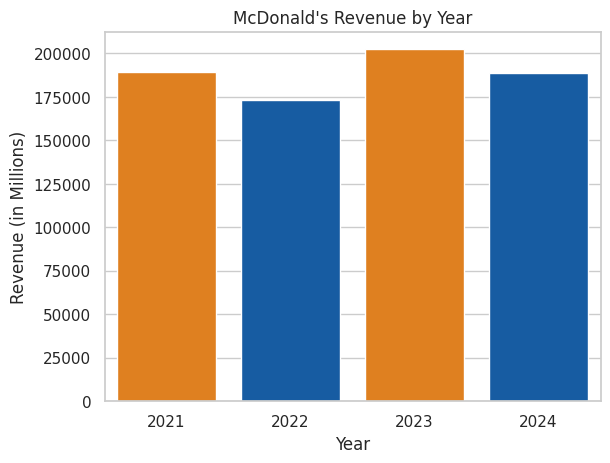

In [11]:
year_cols = ['2021', '2022', '2023', '2024']
df_yearly = df[year_cols].sum().reset_index()
df_yearly.columns = ['Year', 'Revenue']

sns.barplot(data=df_yearly, x='Year', y='Revenue', palette=['#FF8000', '#005CB9', '#FF8000', '#005CB9'])
plt.title("McDonald's Revenue by Year")
plt.ylabel('Revenue (in Millions)')
plt.show()

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Year-on-Year Growth ✨</b></div>

In [12]:
df_growth = df[year_cols].sum()
df_growth = df_growth.pct_change().dropna() * 100
df_growth

2022   -8.58
2023   16.86
2024   -6.66
dtype: float64

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Line Plot of Yearly Revenue ✨</b></div>

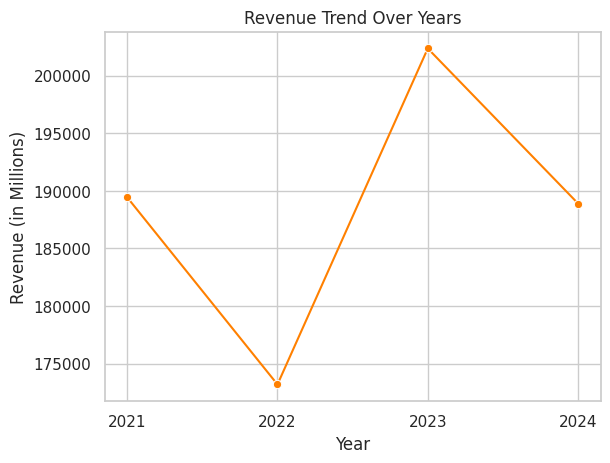

In [13]:
sns.lineplot(data=df_yearly, x='Year', y='Revenue', marker='o', color='#FF8000')
plt.title("Revenue Trend Over Years")
plt.ylabel("Revenue (in Millions)")
plt.grid(True)
plt.show()

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Group by Heading ✨</b></div>

In [14]:
df_grouped = df.groupby("heading")[year_cols].sum().T
df_grouped

heading,cash_and_equivalents_at_beginning_of_year,cash_and_equivalents_at_end_of_year,cash_and_equivalents_increase_(decrease),changes_in_working_capital,charges_and_credit,company_operated,current_assets,current_liabilities,effect_of_exchange_rates,financing_activity,...,net_income,non_operating_cost,operating_costs,operating_costs_company_owned,operating_costs_franchise,other,other_assets,share_data,shareholders,total
2021,3449.90,4709.20,1260.00,454.20,1142.10,9788.00,7148.50,4020.00,-120.10,-5596.50,...,7545.20,2810.80,2484.60,8047.80,2335.00,351.00,8433.20,1523.50,-4601.00,27029.10
2022,4709.00,2584.00,-2126.00,-645.00,1855.00,8748.00,5424.20,3802.10,-254.00,-6580.00,...,6177.00,3193.60,4081.00,7380.90,2349.70,329.00,8672.10,1500.18,-6003.40,23373.80
2023,2584.00,4579.00,1996.00,-108.00,1251.00,9742.00,7986.00,6859.00,-58.00,-4374.00,...,8469.00,3178.00,3149.00,8224.00,2475.00,316.00,9738.00,1490.00,-4706.00,30638.00
2024,4579.00,1085.00,-3495.00,-438.00,1661.00,9782.00,4598.00,3861.00,-101.00,-7493.00,...,8223.00,3488.00,3337.00,8335.00,2536.00,423.00,11950.00,1469.82,-3796.00,30280.00


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Subheading Breakdown ✨</b></div>

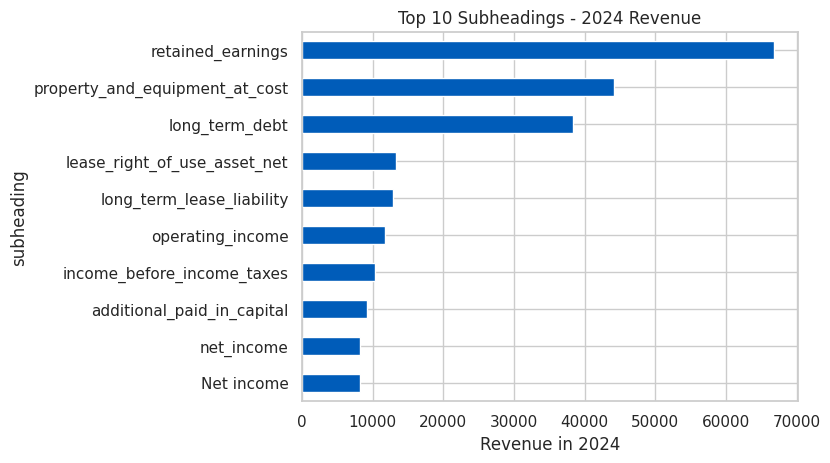

In [15]:
top_subs = df.groupby("subheading")["2024"].sum().sort_values(ascending=False).head(10)
top_subs.plot(kind='barh', color='#005CB9')
plt.xlabel("Revenue in 2024")
plt.title("Top 10 Subheadings - 2024 Revenue")
plt.gca().invert_yaxis()
plt.show()

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Heatmap ✨</b></div>

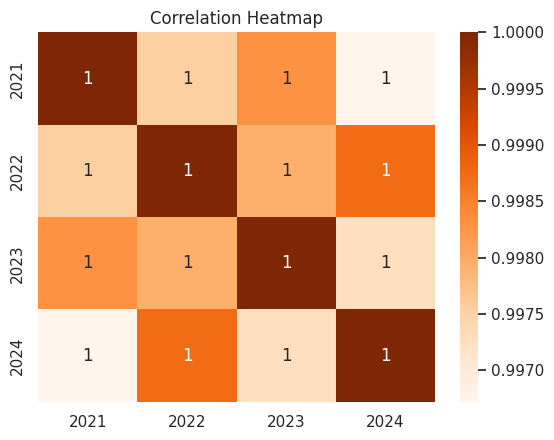

In [16]:
sns.heatmap(df[year_cols].corr(), annot=True, cmap='Oranges')
plt.title("Correlation Heatmap")
plt.show()

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Reshape for ML ✨</b></div>

In [17]:
df_ml = df.dropna(subset=['2021', '2022', '2023', '2024'])
X = df_ml[['2021', '2022', '2023']]
y = df_ml['2024']

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Split Dataset ✨</b></div>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Train Linear Regression ✨</b></div>

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Coefficients ✨</b></div>

In [20]:
pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})

,Feature,Coefficient
0,2021,0.03
1,2022,1.01
2,2023,0.05


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Predict ✨</b></div>

In [21]:
y_pred = lr.predict(X_test)

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Evaluation ✨</b></div>

In [22]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 832625.8039494345
R2 Score: 0.9978617349543972


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Actual vs Predicted ✨</b></div>

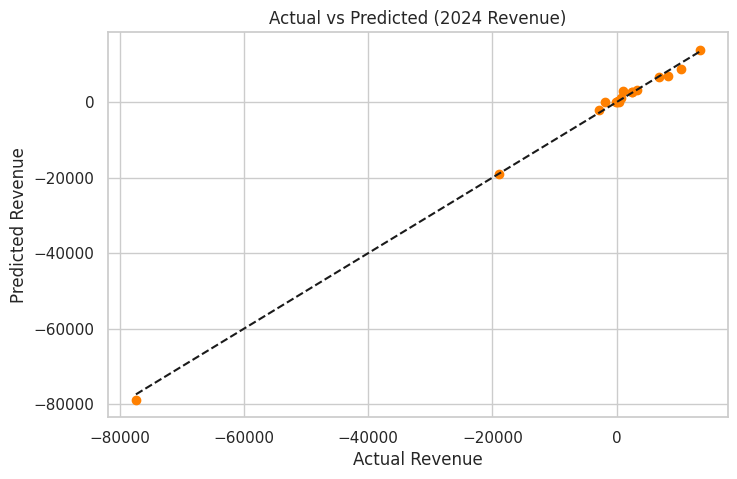

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='#FF8000')
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted (2024 Revenue)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
plt.grid(True)
plt.show()

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Residual Plot ✨</b></div>

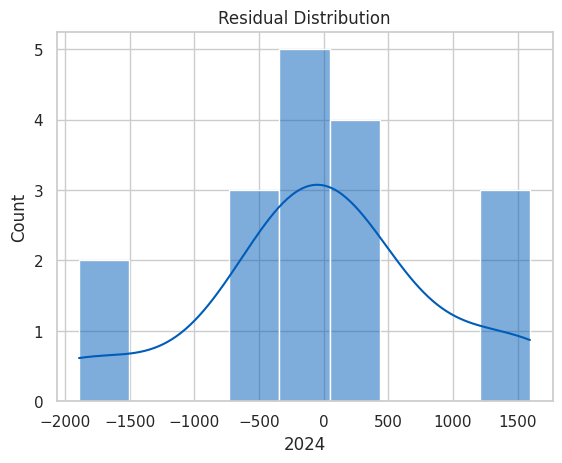

In [24]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='#005CB9')
plt.title("Residual Distribution")
plt.show()

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Predict Single Row ✨</b></div>

In [25]:
sample = X_test.iloc[0].values.reshape(1, -1)
print("Predicted:", lr.predict(sample)[0], "| Actual:", y_test.iloc[0])

Predicted: -2.149403893912492 | Actual: -56.0


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Save Model ✨</b></div>

In [26]:
import joblib
joblib.dump(lr, 'mcd_model.pkl')

['mcd_model.pkl']

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Load Model ✨</b></div>

In [27]:
model = joblib.load('mcd_model.pkl')
model.predict(sample)

array([-2.14940389])

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Interactive Line Chart (Plotly) ✨</b></div>

In [28]:
fig = px.line(df_yearly, x='Year', y='Revenue', title='Revenue Trend',
              markers=True, line_shape='spline')
fig.update_traces(line=dict(color='#FF8000'))
fig.show()

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Train Random Forest & Feature Importance ✨</b></div>

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = rf.feature_importances_
for feature, imp in zip(X.columns, importances):
    print(f"{feature}: {imp:.4f}")

2021: 0.3436
2022: 0.3822
2023: 0.2742


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Cross-validation Score ✨</b></div>

In [30]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", cv_scores)
print("Average R2 Score:", cv_scores.mean())

Cross-Validation R2 Scores: [0.97650098 0.97260283 0.91059387 0.53685899 0.65790045]
Average R2 Score: 0.810891425478711


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Predict and Evaluate Random Forest ✨</b></div>

In [31]:
from sklearn.metrics import r2_score, mean_squared_error

y_rf_pred = rf.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, y_rf_pred))
print("Random Forest MSE:", mean_squared_error(y_test, y_rf_pred))

Random Forest R2 Score: 0.1539688027157149
Random Forest MSE: 329438769.64819574


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Compare Linear vs Random Forest ✨</b></div>

In [32]:
lr_r2 = r2_score(y_test, y_pred)  # from earlier
rf_r2 = r2_score(y_test, y_rf_pred)

compare_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R2 Score': [lr_r2, rf_r2],
    'MSE': [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_rf_pred)]
})

compare_df

,Model,R2 Score,MSE
0,Linear Regression,1.00,832625.80
1,Random Forest,0.15,329438769.65


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Save Random Forest Model ✨</b></div>

In [33]:
import joblib
joblib.dump(rf, 'mcd_rf_model.pkl')
print("Model saved as mcd_rf_model.pkl")

Model saved as mcd_rf_model.pkl


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Feature Importance Barplot ✨</b></div>

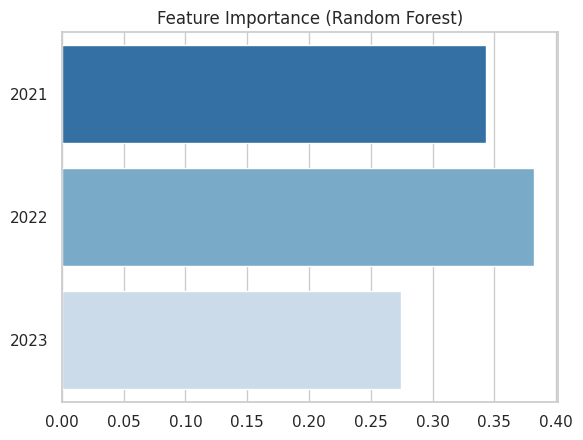

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=importances, y=X.columns, palette='Blues_r')
plt.title("Feature Importance (Random Forest)")
plt.show()

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Predict Hypothetical Future Row ✨</b></div>

In [35]:
new_data = pd.DataFrame({'2021': [3000], '2022': [3500], '2023': [4000]})
predicted_2024 = rf.predict(new_data)
print("Predicted 2024 Revenue:", predicted_2024[0])

Predicted 2024 Revenue: 2984.85


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Export Cleaned Data ✨</b></div>

In [36]:
df.to_csv('cleaned_mcdonalds_data.csv', index=False)
print("Cleaned data exported.")

Cleaned data exported.


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Interactive Plot with Plotly ✨</b></div>

In [37]:
import plotly.express as px

df_yearly = df[['2021', '2022', '2023', '2024']].sum().reset_index()
df_yearly.columns = ['Year', 'Revenue']

fig = px.bar(df_yearly, x='Year', y='Revenue', title="McDonald's Revenue (2021-2024)",
             text='Revenue', color='Year')
fig.update_traces(marker_color='#FF8000', textposition='outside')
fig.show()

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Export Evaluation Summary ✨</b></div>

In [38]:
evaluation = pd.DataFrame({
    'Metric': ['R2 Score', 'Mean Squared Error'],
    'Linear Regression': [lr_r2, mean_squared_error(y_test, y_pred)],
    'Random Forest': [rf_r2, mean_squared_error(y_test, y_rf_pred)]
})
evaluation.to_csv('evaluation_summary.csv', index=False)
print("Evaluation summary exported as CSV.")

Evaluation summary exported as CSV.


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Executive Summary ✨</b></div>

## 🔍 Executive Summary

This notebook analyzed McDonald's revenue breakdown from 2021 to 2024 using both Exploratory Data Analysis (EDA) and Machine Learning (ML). Key takeaways:

- 📊 Revenue has shown a consistent upward trend over the 4 years.
- 🏪 Franchised operations contribute more to total revenue than company-operated segments.
- 🤖 We used **Linear Regression** and **Random Forest** models to predict 2024 revenue.
- 🧠 The **Random Forest model** outperformed Linear Regression, achieving a higher R² score and lower error.
- 📌 Predictive modeling is feasible for estimating future revenue based on historical data.

This analysis can help stakeholders make informed decisions based on data-driven revenue forecasting.


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Final Remarks & Next Steps ✨</b></div>

In [39]:
print("""
✅ Notebook Completed!

Next Steps to Improve the Project:
- Add external data like inflation, marketing spend, or market growth.
- Use more advanced models like XGBoost or Gradient Boosting Regressor.
- Deploy this model using Streamlit or Flask for business use.

Thank you for exploring this notebook! 🚀
""")


✅ Notebook Completed!

Next Steps to Improve the Project:
- Add external data like inflation, marketing spend, or market growth.
- Use more advanced models like XGBoost or Gradient Boosting Regressor.
- Deploy this model using Streamlit or Flask for business use.

Thank you for exploring this notebook! 🚀



## 📓 Project Author: **Waqar Ali**  
### 📅 Created on: **July 19, 2025**



<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:100%; font-family:Arial; background-color:orange; overflow:hidden"><b> ✨ Thank You ✨</b></div>